# 1. Import libraries to be used in this notebook

In [2]:
import numpy as np # for array manipulation and basic scientific calculation
import xarray as xr # To read NetCDF files
import matplotlib.pyplot as plt # Core library for plotting
import matplotlib.cm as cm # To use different colormaps
from functions.Plot_2D import Plot_2D # To draw a map
import cartopy.crs as ccrs # For map projection

# 2. Read files

## 2.1. Model output

In [4]:
File_nanjing = '/glade/derecho/scratch/emmons/archive/f.e3beta01.FCnudged.Nanjing_ne30x8.02/atm/hist/f.e3beta01.FCnudged.Nanjing_ne30x8.02.cam.h1a.2024-02-01-00000.nc'
ds_nanjing = xr.open_dataset( File_nanjing ) 

File_ne30 = '/glade/derecho/scratch/jzhan166/archive/f.e2_2_2.FCnudged.ne30_ne30_mg17.XNOx_PHL_anthro.001/atm/hist/f.e2_2_2.FCnudged.ne30_ne30_mg17.XNOx_PHL_anthro.001.cam.h0.2024-02.nc'
ds_ne30 = xr.open_dataset( File_ne30 )


# File_CONUS = '/glade/campaign/acom/acom-climate/tilmes/CO_CONUS/f.e22.FCcotagsNudged.ne0CONUSne30x8.cesm220.2012-01/atm/hist/f.e22.FCcotagsNudged.ne0CONUSne30x8.cesm220.2012-01.cam.h1.2013-08.nc'
# ds_CONUS = xr.open_dataset( File_CONUS ) 

# File_ne30 = '/glade/campaign/acom/acom-climate/tilmes/CO_CONUS/f.e22.FCnudged.ne30_ne30_mg17.release-cesm2.2.0_spinup.2010_2020.001/atm/hist/f.e22.FCnudged.ne30_ne30_mg17.release-cesm2.2.0_spinup.2010_2020.001.cam.h1.2013-08.nc'
# ds_ne30 = xr.open_dataset( File_ne30 )

# ===================================================
# Some community simulation files you can play with
# ===================================================
# path_commsim = '/glade/campaign/acom/acom-climate/tilmes/CO_CONUS/f.e22.FCcotagsNudged.ne0CONUSne30x8.cesm220.2012-01/atm/hist/'

# # Monthly mean files, interpolated to 0.9x1.25 regular grid
# file_h0 = path_commsim + 'f.e22.FCcotagsNudged.ne0CONUSne30x8.cesm220.2012-01.cam.h0.2013-07.nc'
# ds_h0 = xr.open_dataset( file_h0 ) 

# # Monthly mean files on native unstructured grid
# file_h1 = path_commsim + 'f.e22.FCcotagsNudged.ne0CONUSne30x8.cesm220.2012-01.cam.h1.2013-07.nc'
# ds_h1 = xr.open_dataset( file_h1 ) 

# # Davily averages on native unstructured grid
# file_h2 = path_commsim + 'f.e22.FCcotagsNudged.ne0CONUSne30x8.cesm220.2012-01.cam.h2.2013-07-01-00000.nc'
# ds_h2 = xr.open_dataset( file_h2 ) 

# # 6-hr output, interpolated to 0.9x1.25 regular grid
# file_h3 = path_commsim + 'f.e22.FCcotagsNudged.ne0CONUSne30x8.cesm220.2012-01.cam.h3.2013-07-01-00000.nc'
# ds_h3 = xr.open_dataset( file_h3 ) 

# # 1-hr output on native unstructured grid
# file_h4 = path_commsim + 'f.e22.FCcotagsNudged.ne0CONUSne30x8.cesm220.2012-01.cam.h4.2013-07-01-00000.nc'
# ds_h4 = xr.open_dataset( file_h4 ) 

# ====================================================
# And timeseries files from the community simulation
# ====================================================
# path_tseries = '/glade/campaign/acom/acom-climate/tilmes/CO_CONUS/f.e22.FCcotagsNudged.ne0CONUSne30x8.cesm220.2012-01/atm/proc/tseries/'

# # monthly timeseries files for Ozone (h1 files)
# file_m_o3 = path_tseries + '/month_1/f.e22.FCcotagsNudged.ne0CONUSne30x8.cesm220.2012-01.cam.h1.O3.201201-201212.nc'
# ds_m_o3 = xr.open_dataset( file_m_o3 )

# # daily timeseries files for Ozone (h2 files)
# file_d_o3 = path_tseries + '/day_1/f.e22.FCcotagsNudged.ne0CONUSne30x8.cesm220.2012-01.cam.h2.O3.20120601-20120630.nc'
# ds_d_o3 = xr.open_dataset( file_d_o3 )


## 2.2. Check data we just read
### We can see the variable list and dimension of each variable
### Click on the text "Data variables" will show/hide a list of variables
### Click on the page icon to find out attributes of variable
### To learn more about xarray, check out this webpage: http://xarray.pydata.org/en/stable/user-guide/index.html

In [5]:
ds_nanjing

<xarray.Dataset> Size: 131MB
Dimensions:       (ncol: 60482, lev: 32, ilev: 33, time: 1, nbnd: 2)
Coordinates:
  * lev           (lev) float64 256B 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 264B 2.255 5.032 10.16 ... 967.5 985.1 1e+03
  * time          (time) datetime64[ns] 8B 2024-01-31T12:00:00
Dimensions without coordinates: ncol, nbnd
Data variables: (12/56)
    lat           (ncol) float64 484kB ...
    lon           (ncol) float64 484kB ...
    areawt        (ncol) float64 484kB ...
    area          (ncol) float64 484kB ...
    hyam          (lev) float64 256B ...
    hybm          (lev) float64 256B ...
    ...            ...
    bc_a4         (time, lev, ncol) float32 8MB ...
    pom_a1        (time, lev, ncol) float32 8MB ...
    pom_a4        (time, lev, ncol) float32 8MB ...
    so4_a1        (time, lev, ncol) float32 8MB ...
    so4_a2        (time, lev, ncol) float32 8MB ...
    so4_a3        (time, lev, ncol) float32 8MB ...
Attributes:
    ne:                0
    np:                4
    Conventions:       CF-1.0
    source:            CAM
    case:              f.e3beta01.FCnudged.Nanjing_ne30x8.02
    logname:           emmons
    host:              dec0929
    initial_file:      /glade/work/emmons/tutorial_Nanjing/ne0np4.Nanjing.ne3...
    topography_file:   /glade/work/emmons/tutorial_Nanjing/ne0np4.Nanjing.ne3...
    model_doi_url:     not_set
    time_period_freq:  day_1

## 2.2.1. Looking into the dataset
### Only a few examples are listed here. If you are not familiar with python, see https://ncar-hackathons.github.io/python-general/intro.html
### Numpy (abbreviated as "np") offers comprehensive mathematical functions: https://numpy.org/doc/stable/user/whatisnumpy.html

In [6]:
# Check date. 
print( 'Date:', ds_nanjing.date.values )

# unit of variables
print( 'The unit of O3:', ds_nanjing['O3'].units )
print( 'The unit of SFCO:', ds_nanjing['SFCO'].units )

# Shape of array
print( 'Array shape of O3:', ds_nanjing['O3'].shape )

# min and max values of variables
print( 'O3 [ppbv] min:', np.min(ds_nanjing['O3'].values)*1e9, ', max:', np.max(ds_nanjing['O3'].values)*1e9 )
print( 'SFC O3 [ppbv] min:', np.min(ds_nanjing['O3'].values[:,-1,:])*1e9, ', max:', np.max(ds_nanjing['O3'].values[:,-1,:])*1e9 )



Date: [20240131]
The unit of O3: mol/mol
The unit of SFCO: kg/m2/s
Array shape of O3: (1, 32, 60482)
O3 [ppbv] min: 0.9215239682447418 , max: 9505.504749540705
SFC O3 [ppbv] min: 0.9215239682447418 , max: 85.94799538741427


## 2.3. SCRIP file
### SCRIP file has grid information that is needed to plot values on map
### Don't have to read, just locate where the files are

In [7]:
SCRIP_nanjing = '/glade/work/emmons/tutorial_Nanjing/ne0np4.Nanjing.ne30x8/grids/Nanjing_ne30x8_np4_SCRIP.nc'
SCRIP_ne30 = '/glade/work/tilmes/refgrids/ne30np4_091226_pentagons.nc'
# SCRIP_CONUS = '/glade/p/acom/MUSICA/grids/ne0CONUSne30x8/ne0CONUS_ne30x8_np4_SCRIP.nc'
# SCRIP_ne30 = '/glade/p/acom/MUSICA/grids/ne30np4/ne30np4_091226_pentagons.nc'

# 3. Plot examples

## 3.1. Global map

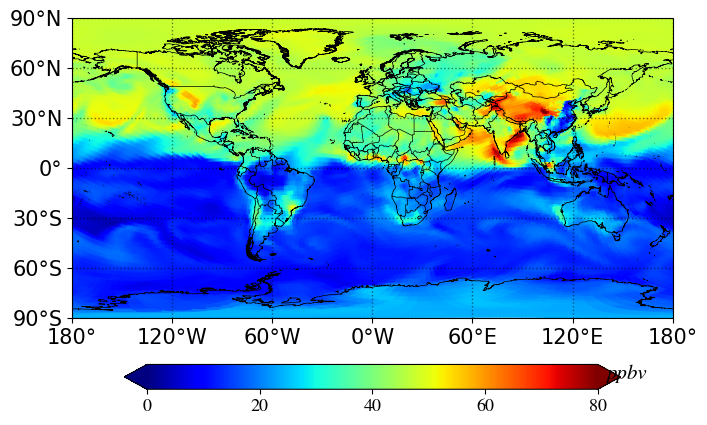

In [8]:
# - multiplied by 1e9 to make "mol/mol" "ppbv"
# - scrip_file must be provided for spectral element grid plot
# - cmax is used to limit plotted colorscale up to 80. cmin can be used for minimum value in a similar way
# - unit is for adding an unit on the plot
Plot_2D( ds_nanjing['O3'][0,-1,:]*1e9, scrip_file=SCRIP_nanjing, cmax=80, unit='ppbv' )

## 3.2. Regional map - East Asia

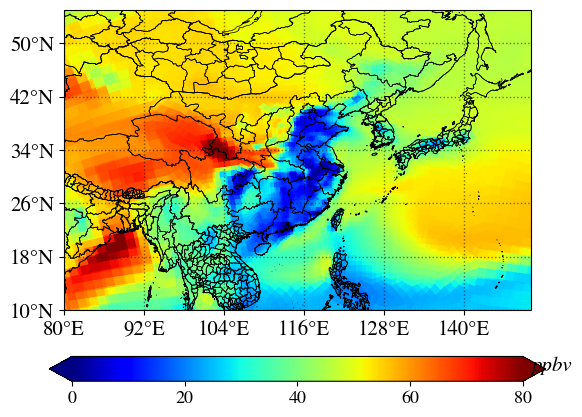

In [9]:
# we can add state lines by state=True
# we can also specify longitude & latitude ranges using lon_range and lat_range keywords
Plot_2D( ds_nanjing['O3'][0,-1,:]*1e9, scrip_file=SCRIP_nanjing,
         cmax=80, unit='ppbv', state=True, lon_range=[80,150], lat_range=[10,55] )


## 3.3. Same as 3.2 but with a custom colorbar

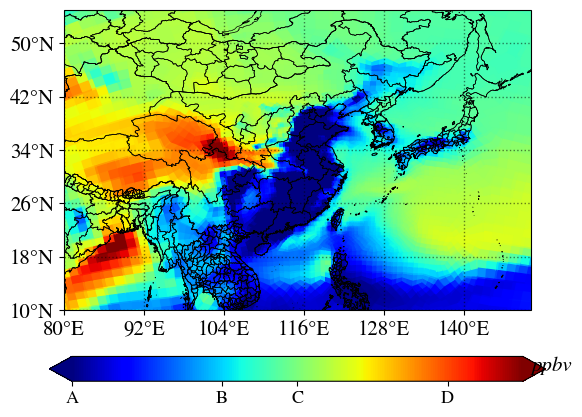

In [10]:
colorticks = [20, 40, 50, 70]
colorlabels = ['A', 'B', 'C', 'D']

# we can add state lines by state=True
# we can also specify longitude & latitude ranges using lon_range and lat_range keywords
Plot_2D( ds_nanjing['O3'][0,-1,:]*1e9, scrip_file=SCRIP_nanjing,
         cmin=20, cmax=80, unit='ppbv', state=True, lon_range=[80,150], lat_range=[10,55],
         colorticks=colorticks, colorlabels=colorlabels)

## 3.4. Add a location point

Text(121.7969, 30.060299999999998, 'Nanjing')

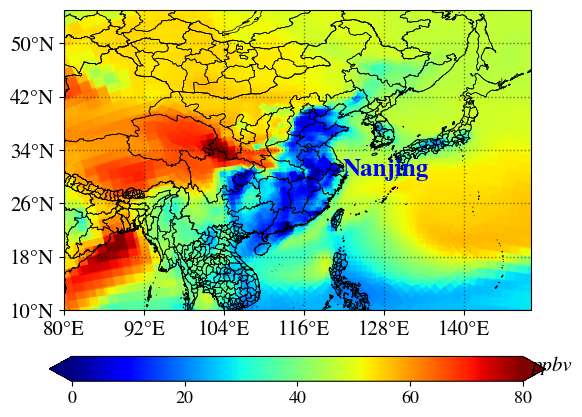

In [11]:
# Now we get an instance from Plot_2D function (p = Plot_2D(...))
p = Plot_2D( ds_nanjing['O3'][0,-1,:]*1e9, scrip_file=SCRIP_nanjing,
             cmax=80, unit='ppbv', state=True, lon_range=[80,150], lat_range=[10,55] )

# Add a circle marker 
p.ax.plot( 118.7969, 32.0603, marker='o', markersize=8, color='blue' )
p.ax.text( 118.7969+3, 32.0603-2, 'Nanjing', color='blue', size=18, weight='semibold' )

## 3.5. Log-scale plot

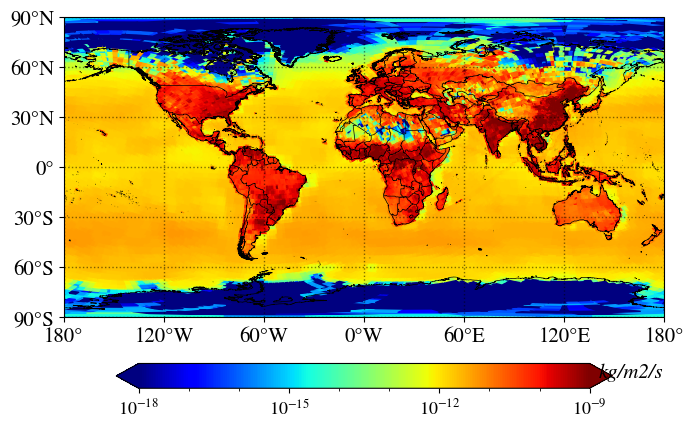

In [14]:
# Add a keyword log_scale=True to draw a plot on a log scale
p = Plot_2D( ds_nanjing['SFCO'][0,:], scrip_file=SCRIP_nanjing, 
             cmin=1e-18, cmax=1e-9,
             log_scale=True, unit='kg/m2/s' )

## 3.6. Plot two panels with different grids - ne30 and ne30x8_nanjing
### See different built-in colormaps in matplotlib: https://matplotlib.org/stable/gallery/color/colormap_reference.html

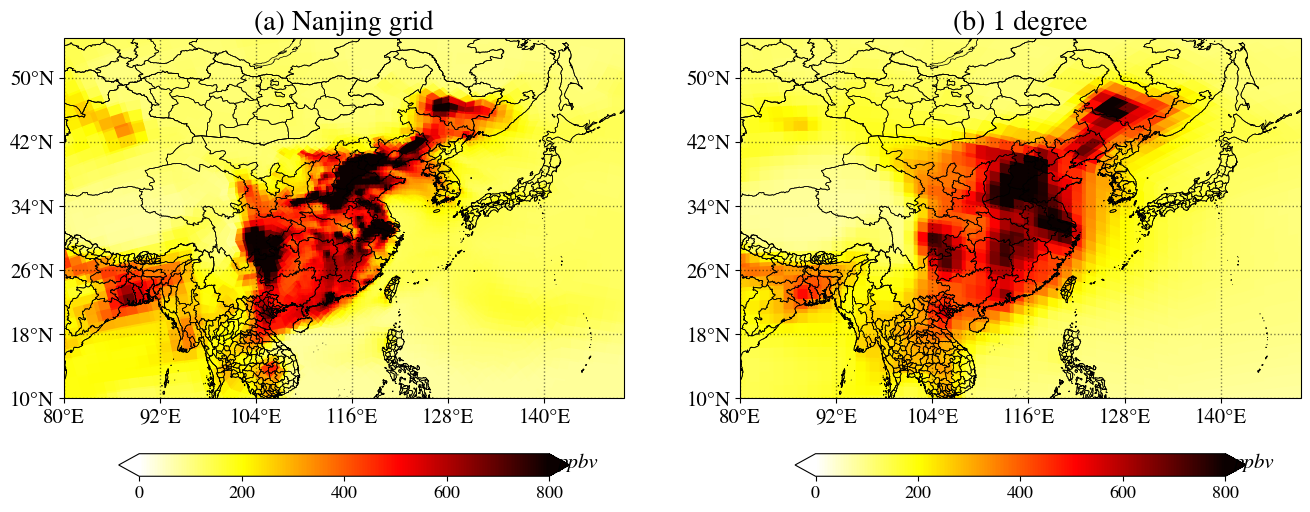

In [15]:
# Create a new figure canvas
fig = plt.figure( figsize=(16,6) ) 

# - title for each plot is added with the "title" keyword
# - we can change colormaps using cmap keyword. Give it a spin: change it to cmap=cm.bwr and see how it changes
# Left panel - ne30x8 regional refinement over CONUS
ax1 = fig.add_subplot(1,2,1,projection=ccrs.PlateCarree())
Plot_2D( ds_nanjing['CO'][0,-1,:]*1e9, scrip_file=SCRIP_nanjing, ax=ax1,
         cmax=800, unit='ppbv', state=True, lon_range=[80,150], lat_range=[10,55],
         title='(a) Nanjing grid', cmap=cm.hot_r )

# Right panel - ne30 global
ax2 = fig.add_subplot(1,2,2,projection=ccrs.PlateCarree())
Plot_2D( ds_ne30['CO'][0,-1,:]*1e9, scrip_file=SCRIP_ne30, ax=ax2,
         cmax=800, unit='ppbv', state=True, lon_range=[80,150], lat_range=[10,55],
         title='(b) 1 degree', cmap=cm.hot_r )


## 3.7. Same as 3.6 but with one big colorbar and title

Text(0.5, 0.92, 'CO mixing ratio')

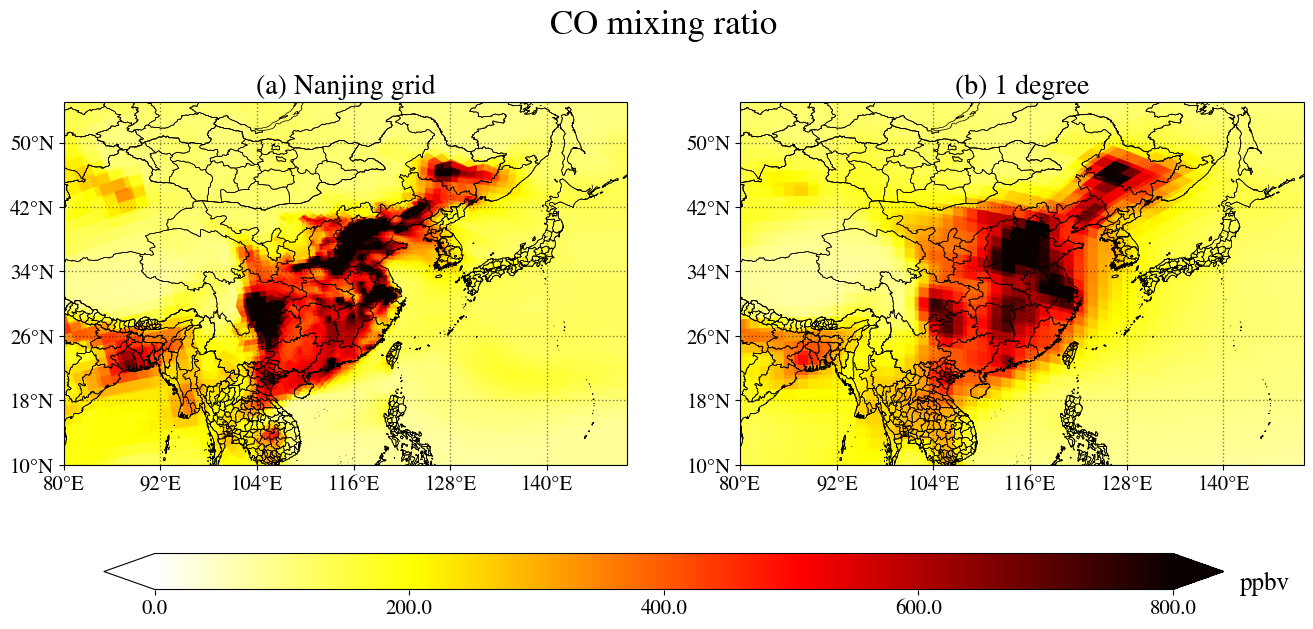

In [16]:
# Create a new figure canvas
fig = plt.figure( figsize=(16,12) ) 

# - title for each plot is added with the "title" keyword
# - we can change colormaps using cmap keyword. Give it a spin: change it to cmap=cm.bwr and see how it changes
# Left panel - ne30x8 regional refinement over CONUS
ax1 = fig.add_subplot(2,2,1,projection=ccrs.PlateCarree())
Plot_2D( ds_nanjing['CO'][0,-1,:]*1e9, scrip_file=SCRIP_nanjing, ax=ax1,
         cmax=800, unit='ppbv', state=True, lon_range=[80,150], lat_range=[10,55],
         title='(a) Nanjing grid', cmap=cm.hot_r, colorbar=False )

# Right panel - ne30 global
ax2 = fig.add_subplot(2,2,2,projection=ccrs.PlateCarree())
p = Plot_2D( ds_ne30['CO'][0,-1,:]*1e9, scrip_file=SCRIP_ne30, ax=ax2,
             cmax=800, unit='ppbv', state=True, lon_range=[80,150], lat_range=[10,55],
             title='(b) 1 degree', cmap=cm.hot_r, colorbar=False )

# Add a colorbar
# set up where a colorbar will be located
cbar_ax = fig.add_axes([0.15,0.45,0.70,0.03])
# plot a colorbar
cb = fig.colorbar( p.im, cax=cbar_ax, extend='both', orientation='horizontal', ticks=p.colorticks )
# Make texts in the colorbar bigger
cb1 = cb.ax.set_xticklabels( p.colorticks, size=15 )

# Add a unit
# - for more details on transformations, check out here: https://matplotlib.org/stable/tutorials/advanced/transforms_tutorial.html
# - we use fig.transFigure here, (0,0) is bottom left of the figure and (1,1) is top right of the figure. 
plt.text( 0.86, 0.45, 'ppbv', transform=fig.transFigure, size=18 )

# Add a title
plt.text( 0.50, 0.92, 'CO mixing ratio', transform=fig.transFigure, size=25, ha='center', va='center' )

## 3.8. Plot with model grid lines and save the figure as png file

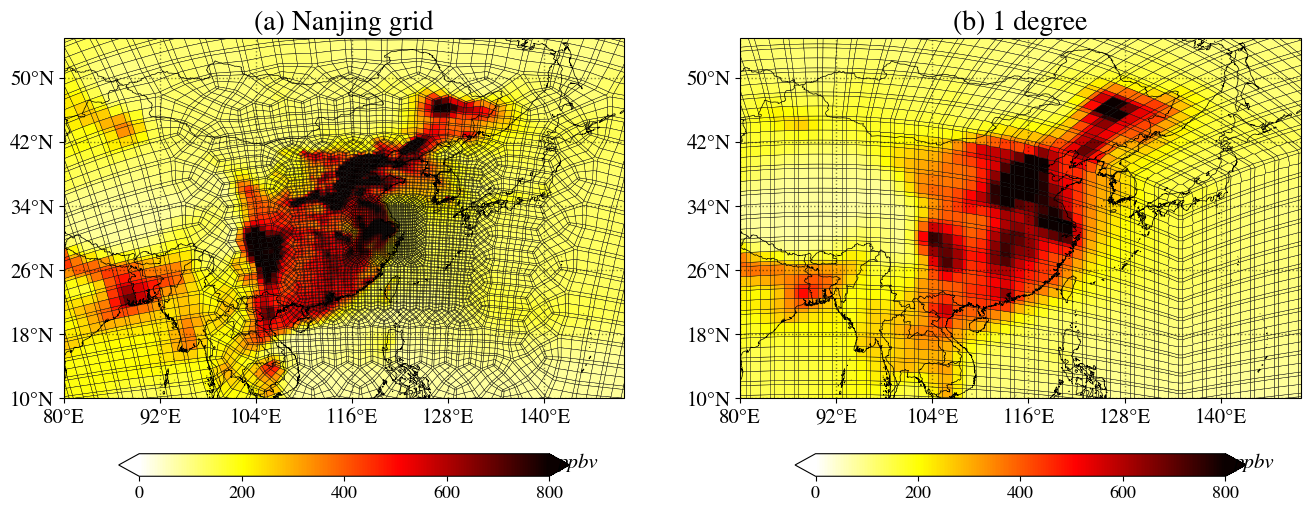

In [17]:
# Create a new figure canvas
fig = plt.figure( figsize=(16,6) ) 

# - title for each plot is added with the "title" keyword
# - we can change colormaps using cmap keyword. Give it a spin: change it to cmap=cm.bwr and see how it changes
# Left panel - ne30x8 regional refinement over CONUS|
ax1 = fig.add_subplot(1,2,1,projection=ccrs.PlateCarree())
Plot_2D( ds_nanjing['CO'][0,-1,:]*1e9, scrip_file=SCRIP_nanjing, ax=ax1,
         cmax=800, unit='ppbv', state=False, lon_range=[80,150], lat_range=[10,55],
         title='(a) Nanjing grid', cmap=cm.hot_r, grid_line=True, grid_line_lw=0.3 )

# Right panel - ne30 global
ax2 = fig.add_subplot(1,2,2,projection=ccrs.PlateCarree())
Plot_2D( ds_ne30['CO'][0,-1,:]*1e9, scrip_file=SCRIP_ne30, ax=ax2,
         cmax=800, unit='ppbv', state=False, lon_range=[80,150], lat_range=[10,55],
         title='(b) 1 degree', cmap=cm.hot_r, grid_line=True, grid_line_lw=0.3 )

# Save this as a png file
plt.savefig( 'CO_Feb_2024.png' )

# Put a question mark after any function to look at the detailed usage

In [18]:
plt.savefig?

Signature: plt.savefig(*args, **kwargs) -> 'None'
Docstring:
Save the current figure as an image or vector graphic to a file.

Call signature::

  savefig(fname, *, transparent=None, dpi='figure', format=None,
          metadata=None, bbox_inches=None, pad_inches=0.1,
          facecolor='auto', edgecolor='auto', backend=None,
          **kwargs
         )

The available output formats depend on the backend being used.

Parameters
----------
fname : str or path-like or binary file-like
    A path, or a Python file-like object, or
    possibly some backend-dependent object such as
    `matplotlib.backends.backend_pdf.PdfPages`.

    If *format* is set, it determines the output format, and the file
    is saved as *fname*.  Note that *fname* is used verbatim, and there
    is no attempt to make the extension, if any, of *fname* match
    *format*, and no extension is appended.

    If *format* is not set, then the format is inferred from the
    extension of *fname*, if there is one.  If